In [1]:
#Example Problem-Decision Tree-DiscriWinston

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read the file
mydata=pd.read_csv("DiscriWinston.csv")
mydata.head()

,Person,Income,InvestAmt,WSJSubscriber,Zscore,Prediction,Unnamed: 6,Unnamed: 7,Unnamed: 8,a1,a2,Unnamed: 11,Unnamed: 12
0,1,66.4,26.9,No,1.707565,No,NaN,NaN,Z,-0.022090802,0.118007213,NaN,NaN
1,2,68.0,7.1,No,-0.664323,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,54.9,21.5,No,1.324370,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,50.6,19.3,No,1.159745,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,54.1,16.7,No,0.775608,No,NaN,NaN,NaN,Income,InvestAmt,NaN,NaN


In [5]:
Y=mydata["WSJSubscriber"]
X=mydata.iloc[:,1:3]
print(Y.head())
print(X.head())

0    No
1    No
2    No
3    No
4    No
Name: WSJSubscriber, dtype: object
   Income  InvestAmt
0    66.4       26.9
1    68.0        7.1
2    54.9       21.5
3    50.6       19.3
4    54.1       16.7


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf_tree.fit(X,Y)
tree_predict=clf_tree.predict(X)
round(accuracy_score(Y,tree_predict),3)

0.952

[Text(125.55000000000001, 190.26, 'X[1] <= 36.0\ngini = 0.436\nsamples = 84\nvalue = [57, 27]\nclass = y[0]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = y[0]'),
 Text(167.4, 135.9, 'X[1] <= 46.4\ngini = 0.327\nsamples = 34\nvalue = [7, 27]\nclass = y[1]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 85.65\ngini = 0.5\nsamples = 12\nvalue = [6, 6]\nclass = y[0]'),
 Text(41.85, 27.180000000000007, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = y[1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = y[0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 51.05\ngini = 0.087\nsamples = 22\nvalue = [1, 21]\nclass = y[1]'),
 Text(209.25, 27.180000000000007, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = y[1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = y[1]')]

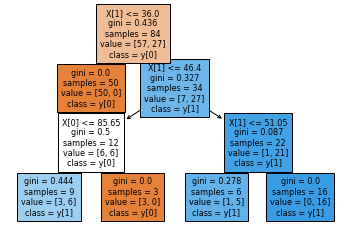

In [7]:
from sklearn import tree
tree.plot_tree(clf_tree, filled=True, class_names=True, fontsize=8)

In [8]:
confusion_matrix(Y,tree_predict)

array([[53,  4],
       [ 0, 27]], dtype=int64)

<AxesSubplot:>

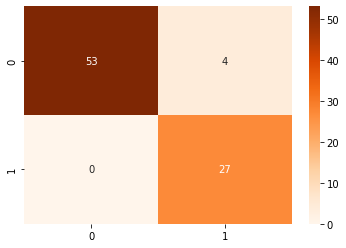

In [9]:
cm=confusion_matrix(Y,tree_predict)
sns.heatmap(cm,annot=True,cmap="Oranges")

In [10]:
from sklearn.metrics import classification_report
Report=classification_report(Y,tree_predict)
print((Report))

              precision    recall  f1-score   support

          No       1.00      0.93      0.96        57
         Yes       0.87      1.00      0.93        27

    accuracy                           0.95        84
   macro avg       0.94      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



In [11]:
importances=clf_tree.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Income","InvestAmt"]
Importance

,Income,InvestAmt
0,0.064566,0.935434


In [12]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"criterion":["gini","entropy"],
                  "max_depth":range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X,Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [13]:
clf.best_score_

0.9883333333333333

In [14]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf_tree.fit(X,Y)
tree_predict=clf_tree.predict(X)
round(accuracy_score(Y,tree_predict),3)

0.964

In [17]:
clf.best_score_

0.9883333333333333